In [1]:
%load_ext autoreload
%autoreload 2

from utils import *
from fdaf import *
import IPython.display as ipd

In [2]:
h = None
signal_microphone, signal_loudspeaker, impulse_response, rate, near_end = generate_signals(h, length_in_seconds=20)

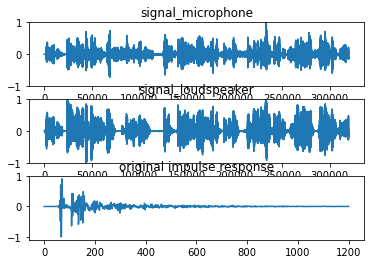

In [3]:
plot_signals(signal_microphone, signal_loudspeaker, impulse_response)

In [4]:
# Loudspeaker signal
ipd.Audio(signal_loudspeaker.reshape(-1), rate=rate)

In [5]:
# Microphone signal
ipd.Audio(signal_microphone.reshape(-1), rate=rate)

## Test BFDF

In [6]:
x = get_shifted_blocks(signal_loudspeaker,1024,512)
h = get_shifted_blocks(impulse_response,1024,512)
X = fft.fft(x)
H = fft.fft(h)
y = BFDF(X,H,512)
print(X.shape,H.shape,y.shape)
ipd.Audio(y.T,rate=rate)

(624, 1024) (2, 1024) (319488, 1)


## Test FDAF_OS

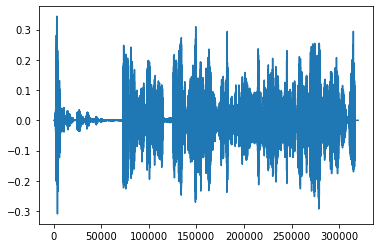

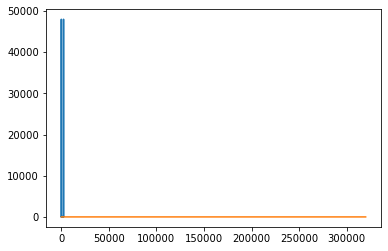

In [7]:
fi = np.asarray([[4,20]])*2*rate
fi = None
e,y,H,p, open_loop_rhos, closed_loop_rhos, adapt_flag = FDAF_OS(signal_loudspeaker,signal_microphone, open_loop_threshold=0.8, closed_loop_threshold=0.95, freeze_index=fi)

plt.plot(e.ravel())
plt.figure()
plt.plot(p.T)
plt.plot(y)
ipd.Audio(y.ravel(),rate=rate)

In [8]:
ipd.Audio(e.ravel(),rate=rate)

Text(0.5, 0, 'Iteration')

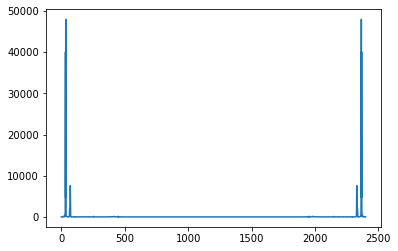

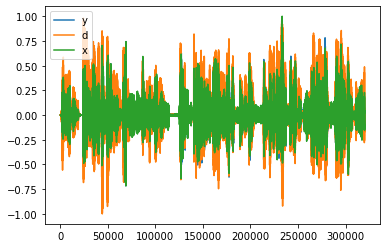

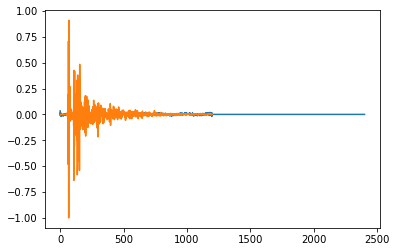

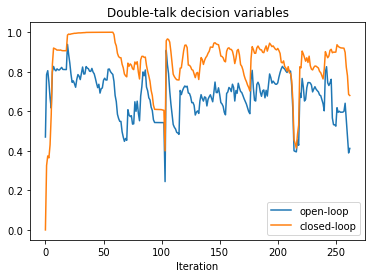

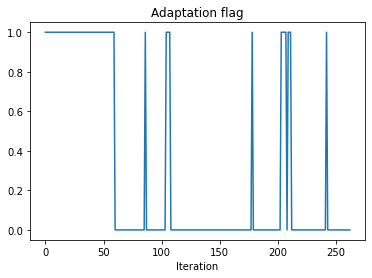

In [9]:
plt.plot(abs(p).ravel())
plt.figure()
plt.plot(y.ravel())
plt.plot(signal_loudspeaker.ravel())
plt.plot(signal_microphone.ravel())
plt.legend(['y','d','x'],loc='upper left')


plt.figure()
h = fft.ifft(H).real.ravel()
plt.plot(h)
plt.plot(impulse_response)

plt.figure()
plt.plot(open_loop_rhos)
plt.plot(closed_loop_rhos)
plt.title('Double-talk decision variables')
plt.legend(['open-loop', 'closed-loop'])
plt.xlabel('Iteration')

plt.figure()
plt.title('Adaptation flag')
plt.plot(adapt_flag)
plt.xlabel('Iteration')
